## Classification Rules

**Environment Details**: 
- **OS**: OpenSUSE Tumbleweed (x86_64)
- **Python version**: 3.11.6
- **Jupyter-Lab version**: 4.0.9
***

### Goal
Your goal is to classify whether a car is acceptable or not for resale. 

The target feature in the dataset is **acceptability**.

Use the remaining nominal features to make your classification using the classification rules discussed in lecture.
***

### Pre-task setup

In [1]:
# Imports
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-Learn imports
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Ripper algorithm implementation
import wittgenstein as lw

# Scipy Chi-Squared Test
from scipy.stats import chi2_contingency

# Nicer Jupyter output formatting
import ipywidgets as widgets

# Quiet filter warnings
import warnings
warnings.filterwarnings('ignore')

***

### 0) DataFrame Creation

In [2]:
# Load our CSV data into a Pandas DataFrame
df = pd.read_csv('car.csv')

In [3]:
# Ensure our data loaded correctly
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### 1) Data Preprocessing

**Instructions**: After Loading in the Dataset. Do any preprocessing steps needed. The point is that I want to see what your thought process and approach is; this is what I'm grading on more than total correctness of code and procedure.

(a) Since the Ripper algorithm only works with binary classification, modify the acceptability feature such that 'good' and 'vgood' are changed to 'acc'.

(b) Remove any features that would not be beneficial to the model. Justify why you're removing them.

(c) Handle missing values properly. Just getting rid of good data is not an acceptable practice.

Remember, if no features need to be removed and there are no missing values, then you don't need to do anything, but be sure to mention that in your work.

#### 1.1) Modify the acceptability feature

In [4]:
# (a) Since the Ripper algorithm only works with binary classification, modify the acceptability feature such that 'good' and 'vgood' are changed to 'acc'.

# Look at our acceptability value counts before modifying them
df['acceptability'].value_counts()

acceptability
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [5]:
# Map statuses to 'acc'
status_map = {'good': 'acc',
              'vgood': 'acc'}

# Apply mapping on acceptability feature
df['acceptability'].replace(status_map, inplace=True)

In [6]:
# Make sure our mapping worked correctly
df['acceptability'].value_counts()

acceptability
unacc    1210
acc       518
Name: count, dtype: int64

#### 1.2) Remove features

In [7]:
# (b) Remove any features that would not be beneficial to the model. Justify why you're removing them.

# Let's take a look at some descriptive statistics to see if any feature stands out for removing
df.describe()

,buying,maint,doors,persons,lug_boot,safety,acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,2
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


#### 1.3) Look for missing values

In [8]:
# (c) Handle missing values properly. Just getting rid of good data is not an acceptable practice.

# Look at information about our dataset, specifically if we have missing values that need to be handled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying         1728 non-null   object
 1   maint          1728 non-null   object
 2   doors          1728 non-null   object
 3   persons        1728 non-null   object
 4   lug_boot       1728 non-null   object
 5   safety         1728 non-null   object
 6   acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
# Display the features that have Null/NaN values
df.columns[df.isna().any()].tolist()

[]

In [10]:
# Double-check our output above by printing how many values are Null/NaN
print(df.isna().sum())

buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64


**Analysis**:

Based on the output above, there don't appear to be any missing values. Nothing further is needed for this preprocessing step.

### 2) Descriptive Statistics

**Instructions**: Give the descriptive statistics for the different variables. Frequency counts for each unique value in each feature works fine for categorical variables.

In [11]:
# Look at summary statistics of our numeric dataset
df.describe()

,buying,maint,doors,persons,lug_boot,safety,acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,2
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [12]:
# Look at frequency counts for buying
df.value_counts("buying")

buying
high     432
low      432
med      432
vhigh    432
Name: count, dtype: int64

In [13]:
# Look at frequency counts for maint
df.value_counts("maint")

maint
high     432
low      432
med      432
vhigh    432
Name: count, dtype: int64

In [14]:
# Look at frequency counts for doors
df.value_counts("doors")

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

In [15]:
# Look at frequency counts for persons
df.value_counts("persons")

persons
2       576
4       576
more    576
Name: count, dtype: int64

In [16]:
# Look at frequency counts for lug_boot
df.value_counts("lug_boot")

lug_boot
big      576
med      576
small    576
Name: count, dtype: int64

In [17]:
# Look at frequency counts for safety
df.value_counts("safety")

safety
high    576
low     576
med     576
Name: count, dtype: int64

In [18]:
# Look at frequency counts for acceptability
df.value_counts("acceptability")

acceptability
unacc    1210
acc       518
Name: count, dtype: int64

**Analysis**

Apart from our target, all of the features are evenly distributed (exactly even spread in each feature's categories).

### 3) Data Visualization

**Instructions**: Visualize the data appropriately, bar plots work best with categorical data. You can create multiple separate plots or one big plot, but if you make one big plot, make sure all the subplots are visible and clear.

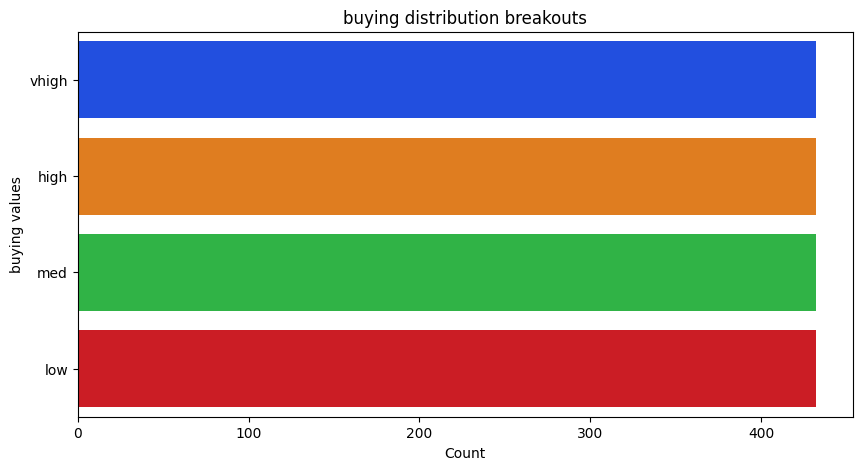

In [19]:
# Get the counts for buying
feature_count = df['buying'].value_counts()

# Plot the counts as a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_count.values, y=feature_count.index, palette='bright')
plt.xlabel('Count')
plt.ylabel('buying values')
plt.title('buying distribution breakouts')
plt.show()

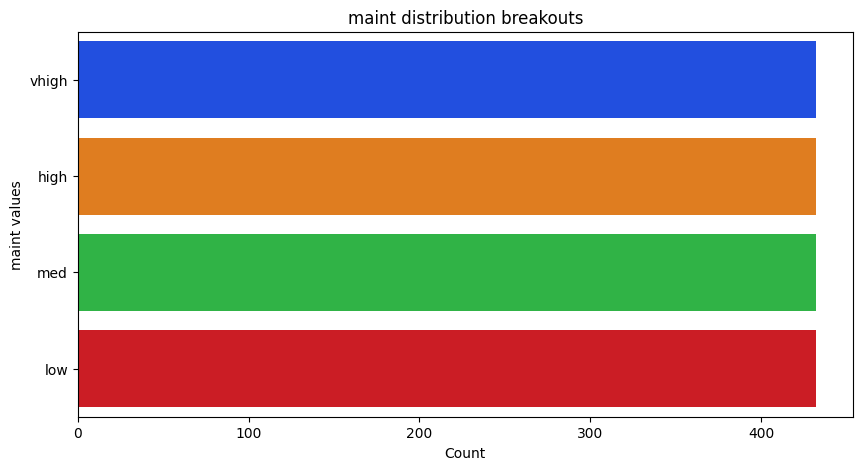

In [20]:
# Get the counts for maint
feature_count = df['maint'].value_counts()

# Plot the counts as a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_count.values, y=feature_count.index, palette='bright')
plt.xlabel('Count')
plt.ylabel('maint values')
plt.title('maint distribution breakouts')
plt.show()

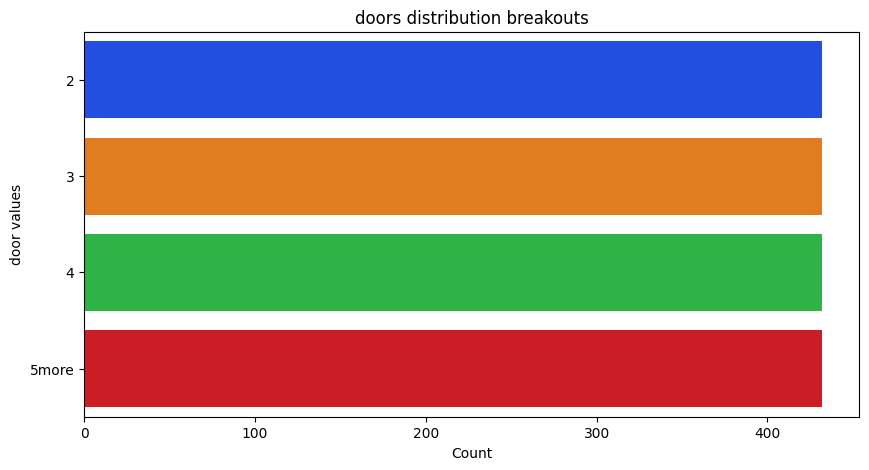

In [21]:
# Get the counts for doors
feature_count = df['doors'].value_counts()

# Plot the counts as a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_count.values, y=feature_count.index, palette='bright')
plt.xlabel('Count')
plt.ylabel('door values')
plt.title('doors distribution breakouts')
plt.show()

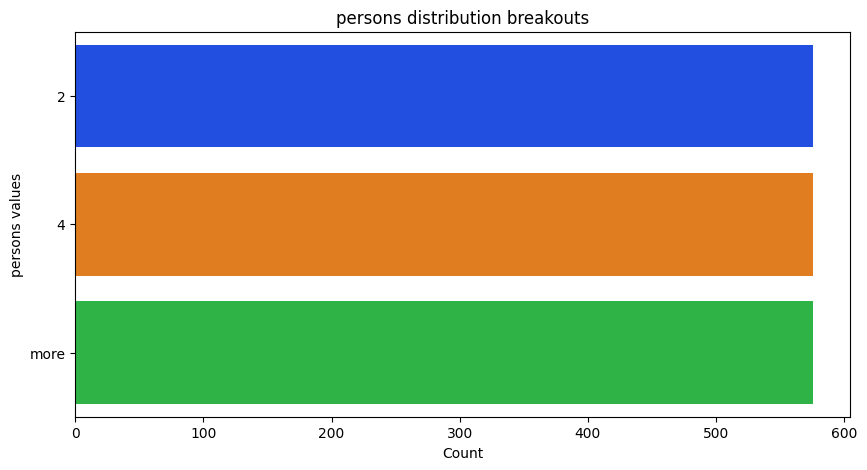

In [22]:
# Get the counts for persons
feature_count = df['persons'].value_counts()

# Plot the counts as a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_count.values, y=feature_count.index, palette='bright')
plt.xlabel('Count')
plt.ylabel('persons values')
plt.title('persons distribution breakouts')
plt.show()

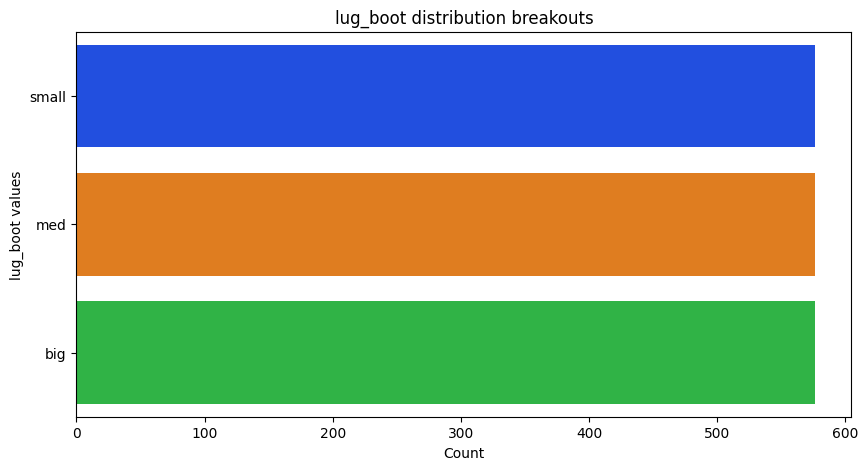

In [23]:
# Get the counts for lug_boot
feature_count = df['lug_boot'].value_counts()

# Plot the counts as a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_count.values, y=feature_count.index, palette='bright')
plt.xlabel('Count')
plt.ylabel('lug_boot values')
plt.title('lug_boot distribution breakouts')
plt.show()

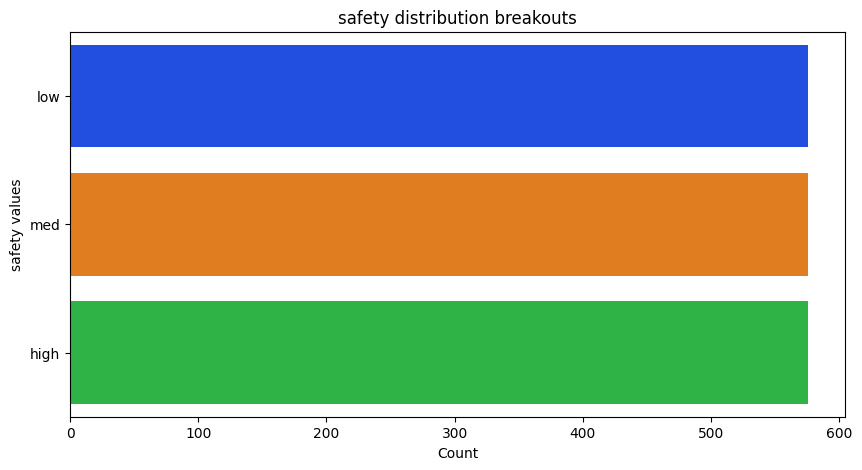

In [24]:
# Get the counts for safety
feature_count = df['safety'].value_counts()

# Plot the counts as a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_count.values, y=feature_count.index, palette='bright')
plt.xlabel('Count')
plt.ylabel('safety values')
plt.title('safety distribution breakouts')
plt.show()

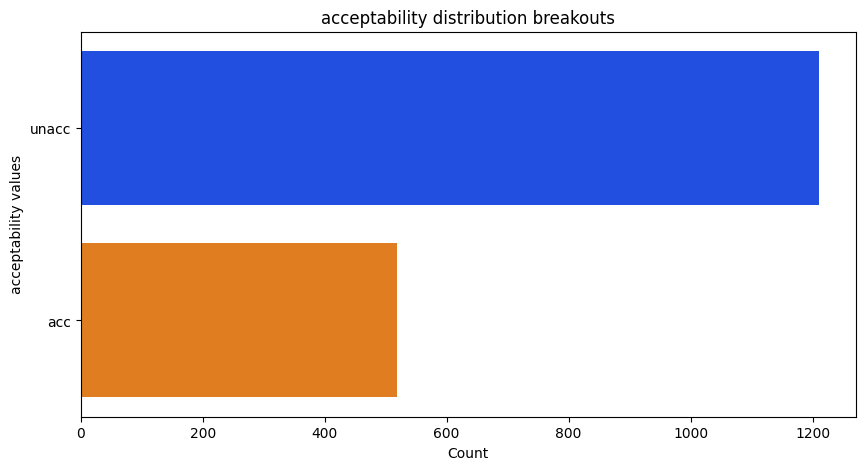

In [25]:
# Get the counts for acceptability
feature_count = df['acceptability'].value_counts()

# Plot the counts as a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_count.values, y=feature_count.index, palette='bright')
plt.xlabel('Count')
plt.ylabel('acceptability values')
plt.title('acceptability distribution breakouts')
plt.show()

**Analysis**:

Confirming what we saw in the previous step with descriptive statistics, every single feature except for our 'acceptability' target has an equal split.

I had to double-check the original data set to make sure I didn't accidentally goof something up in the previous data preprocessing phase, but validated that this is correct for the data set we were given.

### 4) Chi-Squared Test & Analysis

**Instructions**: For categorical data, correlation isn't a great metric for the relationship between variables. Instead, we like to use the Chi-Squared test from traditional statistics. Read up on it here and use the code from lecture to compute a Chi-Squared matrix between all the features. Discuss any interesting observations. Look for the p-values; I'm generalizing, but small values where p-value < 0.05 generally is telling us that there is a correlation between two categorical variables

* **Null Hypothesis**: The two features are independent of one another
* **Alternative Hypothesis**: The two features are **not** independent of one another; there is some relationship between the features

In [26]:
# Encode our categorical features to be numeric into a new df_factorized dataframe
df_factorized = df.apply(lambda x: pd.factorize(x)[0]) + 1

In [27]:
# Make sure our encoding worked
df_factorized.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


In [28]:
# Get the number of features
num_features = df_factorized.shape[1]
print("Number of features: {}".format(num_features))

# Create our chi-squared matrix
chi_sq_mat = pd.DataFrame(index=df_factorized.columns, columns=df_factorized.columns)

Number of features: 7


In [29]:
# Make sure our chi-squared matrix got created correctly
chi_sq_mat

,buying,maint,doors,persons,lug_boot,safety,acceptability
buying,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maint,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doors,NaN,NaN,NaN,NaN,NaN,NaN,NaN
persons,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lug_boot,NaN,NaN,NaN,NaN,NaN,NaN,NaN
safety,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acceptability,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Populate our chi-squared table
for i in range(num_features):
    for j in range(num_features):
        contingency_table = pd.crosstab(df_factorized.iloc[:,i], df_factorized.iloc[:,j])
        # Run our Chi-squared contingency analysis
        chi2, pvalue, dof, exp_freq = chi2_contingency(contingency_table)
        # Save our p-value in our chi-squared matrix
        chi_sq_mat.iloc[i,j] = pvalue

In [31]:
# Print out our chi-squared matrix
chi_sq_mat

,buying,maint,doors,persons,lug_boot,safety,acceptability
buying,0.0,1.0,1.0,1.0,1.0,1.0,0.0
maint,1.0,0.0,1.0,1.0,1.0,1.0,0.0
doors,1.0,1.0,0.0,1.0,1.0,1.0,0.035259
persons,1.0,1.0,1.0,0.0,1.0,1.0,0.0
lug_boot,1.0,1.0,1.0,1.0,0.0,1.0,0.0
safety,1.0,1.0,1.0,1.0,1.0,0.0,0.0
acceptability,0.0,0.0,0.035259,0.0,0.0,0.0,0.0


**Analysis**:

Nearly all of our feature pairings (except the self pairings) have p-values of `1.0`, so we fail to reject the null hypothesis of the features being independent of one another.

Given this, I'm not going to remove any features prior to training my model.

### 5) Data Split

**Instructions**: Split the data into training and testing sets. Please use 42 for the random_state parameter.

In [32]:
# Create our X & y dependent & target variable data sets
y = df['acceptability']
X = df.drop(columns=['acceptability'], axis=1)

# Split our data into training & test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
# Ensure our data split correctly
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (1296, 6)
X_test: (432, 6)
y_train: (1296,)
y_test: (432,)


### 6) Model Training

**Instructions**: Train your model using the RIPPER algorithm. Have 'acc' be the positive class. Remember that (1a) asked you to modify the acceptability feature so there are only 'acc' and 'unacc'.

In [34]:
# Instantiate our Ripper classifier
ripper_clf = lw.RIPPER(random_state=42, verbosity=1)

# Fit our model, choose 'acc' as the positive class for our target
ripper_clf.fit(X_train, y_train, pos_class='acc')


GREW INITIAL RULESET:
[[safety=high ^ persons=4 ^ maint=med] V
[safety=high ^ persons=more ^ buying=low ^ doors=5more] V
[safety=high ^ persons=4 ^ maint=low] V
[persons=more ^ safety=high ^ buying=med ^ doors=3] V
[persons=more ^ safety=high ^ maint=med] V
[safety=med ^ persons=more ^ lug_boot=med ^ doors=4] V
[safety=med ^ lug_boot=big ^ persons=4 ^ buying=med] V
[safety=med ^ persons=more ^ buying=med ^ lug_boot=big] V
[safety=med ^ buying=low ^ persons=4 ^ lug_boot=big] V
[persons=more ^ safety=high ^ buying=low] V
[persons=4 ^ safety=high ^ buying=low] V
[safety=med ^ persons=more ^ lug_boot=big ^ buying=low] V
[persons=more ^ safety=med ^ lug_boot=med ^ doors=5more] V
[safety=med ^ persons=more ^ maint=low] V
[persons=4 ^ safety=med ^ buying=low] V
[persons=more ^ safety=high ^ maint=low ^ doors=4] V
[safety=high ^ persons=more ^ maint=low ^ doors=5more] V
[safety=high ^ persons=4 ^ buying=med] V
[safety=med ^ persons=4 ^ maint=low ^ lug_boot=big] V
[persons=more ^ safety=high ^

### 7) Model Predictions & Analysis

**Instructions**: Using testing data, predict values using your model. Then, print and discuss the confusion matrix. Note the analysis metrics accuracy, precision, recall, and F1 scores and discuss what you find.

#### 7.1) Metrics

In [35]:
# Make a prediction with our test data
y_pred = ripper_clf.predict(X_test)

In [36]:
# The prediction above outputs True & False rather than 'acc' and 'unacc'.
# That prevents us from creating a confusion matrix below due to unmatched data types.
# Let's fix this with a list comprehension to map True to 'acc' and False to 'unacc':
y_pred_map=['acc' if x==True else 'unacc' for x in y_pred]

In [37]:
# Output accuracy, precision, recall, & F1 metrics for our model using scikit-learn's metrics library:
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred_map)))
print("Precision: {}".format(metrics.precision_score(y_test, y_pred_map, average='macro')))
print("Recall: {}".format(metrics.recall_score(y_test, y_pred_map, average='macro')))
print("F1 Score: {}".format(metrics.f1_score(y_test, y_pred_map, average='macro')))

Accuracy: 0.9490740740740741
Precision: 0.9322742474916388
Recall: 0.958740017746229
F1 Score: 0.9432867883995704


#### 7.2) Confusion Matrix

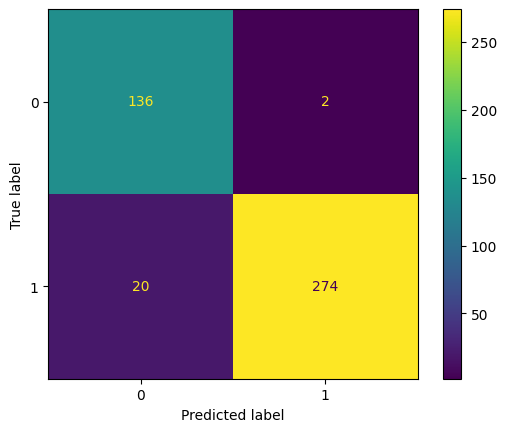

In [38]:
# Display our Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred_map)
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()

**Analysis**:

Looking at our Accuracy, Precision, Recall, & F1 Score above, we're in the low to mid 90s across the board. These metrics match up with the output of the confusion matrix above.

Based off our performance metrics, I'd say we have a pretty decent model that doesn't appear to be overfit to our training data. It did have a few more false negatives (20) than false positives (2), but compared to true negatives/true positives, it seemed to perform pretty well. I'm happy with the results.

### 8) Output Final Rules & Analysis

**Instructions**: Print out the rules again, state what feature or features are most important to classification.

In [39]:
# Pretty print the final rulset
ripper_clf.ruleset_.out_pretty()

[[safety=high ^ persons=4 ^ maint=med] V
[safety=high ^ persons=more ^ buying=low ^ doors=5more] V
[safety=high ^ persons=4 ^ maint=low] V
[persons=more ^ safety=high ^ buying=med ^ doors=3] V
[persons=more ^ safety=high ^ maint=med] V
[safety=med ^ persons=more ^ lug_boot=med] V
[safety=med ^ lug_boot=big ^ persons=4] V
[safety=med ^ persons=more ^ buying=med] V
[persons=more ^ safety=high ^ buying=low] V
[persons=4 ^ safety=high ^ buying=low] V
[safety=med ^ persons=more ^ lug_boot=big ^ buying=low] V
[safety=med ^ persons=more ^ lug_boot=big ^ maint=low] V
[persons=4 ^ safety=med ^ buying=low] V
[persons=more ^ safety=high ^ maint=low ^ doors=4] V
[safety=high ^ persons=more ^ maint=low ^ doors=5more] V
[safety=high ^ persons=4 ^ buying=med] V
[persons=more ^ safety=high ^ buying=med] V
[safety=med ^ maint=med ^ persons=4 ^ buying=med] V
[safety=med ^ persons=more ^ maint=med ^ buying=low] V
[buying=high ^ maint=high ^ safety=high] V
[safety=med ^ persons=more ^ lug_boot=big ^ maint

In [40]:
# Let's cast the final ruleset as a string to count the number of times a feature appears in the ruleset
final_ruleset = str(ripper_clf.ruleset_)

# Count up and print out the number of occurrences of each feature in the ruleset; don't include our target
for feature in df.columns.drop('acceptability'):
    feature_count = final_ruleset.count(feature)
    print(f'{feature} count: {feature_count}')

buying count: 14
maint count: 13
doors count: 6
persons count: 25
lug_boot count: 8
safety count: 26


**Final Analysis**:

If we go strictly based on the number of times that a feature appears in the final ruleset, then the top 4 most important features for classification were:
1. safety
2. persons
3. buying
4. maint

The `lug_boot` and `doors` features were also present, but much less frequently than the previous top 4.